In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

In [19]:
#لعمل ملف pdf
from weasyprint import HTML
import tempfile
from plotly.io import write_image

In [20]:
# Load data
cases = pd.read_csv("cleaned_ncr_data8-25.csv")

In [21]:
# عرض أسماء الأعمدة
print("Columns in dataset:")
print(cases.columns.tolist())
print("\n" + "="*50 + "\n")

Columns in dataset:
['ID', 'Month', 'Record_Date', 'Source', '100', 'Column1', 'Code', 'Column2', 'Forms_Used', 'Event_Area', 'Equipment_Tool', 'Department', 'Reporter_ID', 'Reporter_Name', 'Report_Editor', 'Description', 'Cause', 'Shift', 'Risk_Level', 'Sent', 'Corrective_Action', 'Applied_By', 'Target_Date', 'On_Progress', 'Follow_Up', 'Followed_By', 'Close_Date', 'Closed_On_Time', 'Penalty_Case', 'Unnamed: 29', 'Unnamed: 30', 'Notes']




In [22]:
# تحليل البيانات حسب الشهر وحالة Follow_Up
monthly_cases = cases.groupby(['Month', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("Cases by Month and Follow_Up status:")
print(monthly_cases)
print("\n" + "="*50 + "\n")

Cases by Month and Follow_Up status:
Follow_Up  Closed  Opened
Month                    
أغسطس-25       11       1
يوليو-25       12       1




In [23]:
# تحليل البيانات حسب القسم وحالة Follow_Up
dept_cases = cases.groupby(['Department', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
print("Cases by Department and Follow_Up status:")
print(dept_cases)
print("\n" + "="*50 + "\n")

Cases by Department and Follow_Up status:
Follow_Up               Closed  Opened
Department                            
Administrative Affairs       4       0
Binding                      2       0
Engineering Department       5       0
IT                           0       1
Production                   1       0
Sheet Printing               1       0
Stores                       1       0
Web                          9       1




In [24]:
reporter_cases = cases.groupby(['Reporter_Name', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int).reset_index()
reporter_cases

Follow_Up,Reporter_Name,Closed,Opened
0,Ahmed Morsi Morsi,14,0
1,Ahmed Saad Tolba,2,0
2,Alaa Antar Mohamed,1,0
3,Ali Salah Ali,2,1
4,Karim Magdy Ahmed,1,0
5,Mohamed Mahmoud Abdelal,1,0
6,Mohamed Moussa Ismail,2,1


In [25]:
px.bar(data_frame=reporter_cases, x='Reporter_Name', y=['Closed', 'Opened'], barmode='group',text_auto=True)

In [26]:
# إعادة هيكلة البيانات لدمج العمودين
df_melted = reporter_cases.melt(id_vars=['Reporter_Name'], 
                               value_vars=['Closed', 'Opened'],
                               var_name='Case_Status', 
                               value_name='Count')

# إنشاء عمود جديد يجمع بين اسم المراسل وحالة الحالة
df_melted['Reporter_Status'] = df_melted['Reporter_Name'] + ' - ' + df_melted['Case_Status']

# إنشاء Pie Chart واحد يدمج كلا العمودين
fig = px.pie(df_melted, 
             values='Count', 
             names='Reporter_Status',
             title='توزيع الحالات المغلقة والمفتوحة لكل مراسل',
             color='Case_Status',  # تلوين حسب نوع الحالة
             color_discrete_map={'Closed': 'lightblue', 'Opened': 'lightgreen'})

# تحسين التخطيط
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()
                  

In [27]:
# أو الطريقة الصحيحة 2: استخدام index مباشرة
reporter_cases = cases.groupby(['Reporter_Name', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)

px.bar(data_frame=reporter_cases.reset_index(), x='Reporter_Name', y=['Closed', 'Opened'], barmode='group',text_auto=True)

In [28]:
# أو الطريقة الصحيحة 3: استخدام orientation='h' إذا أردت أسماء المراسلين على المحور y
px.bar(data_frame=reporter_cases.T, orientation='h', title='Cases by Reporter',text_auto=True)

In [29]:
import plotly.express as px

# إنشاء البيانات
reporter_cases = cases.groupby(['Reporter_Name', 'Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int).reset_index()

# إنشاء الرسم البياني مع القيم على الأعمدة
fig = px.bar(
    data_frame=reporter_cases, 
    x='Reporter_Name', 
    y=['Closed', 'Opened'], 
    barmode='group',
    title='عدد الحالات لكل مراسل',
    labels={'value': 'عدد الحالات', 'variable': 'حالة المتابعة', 'Reporter_Name': 'اسم المراسل'}
)

# إضافة القيم على الأعمدة
fig.update_traces(texttemplate='%{y}', textposition='outside')

# عرض الرسم
fig.show()

<Figure size 1400x800 with 0 Axes>

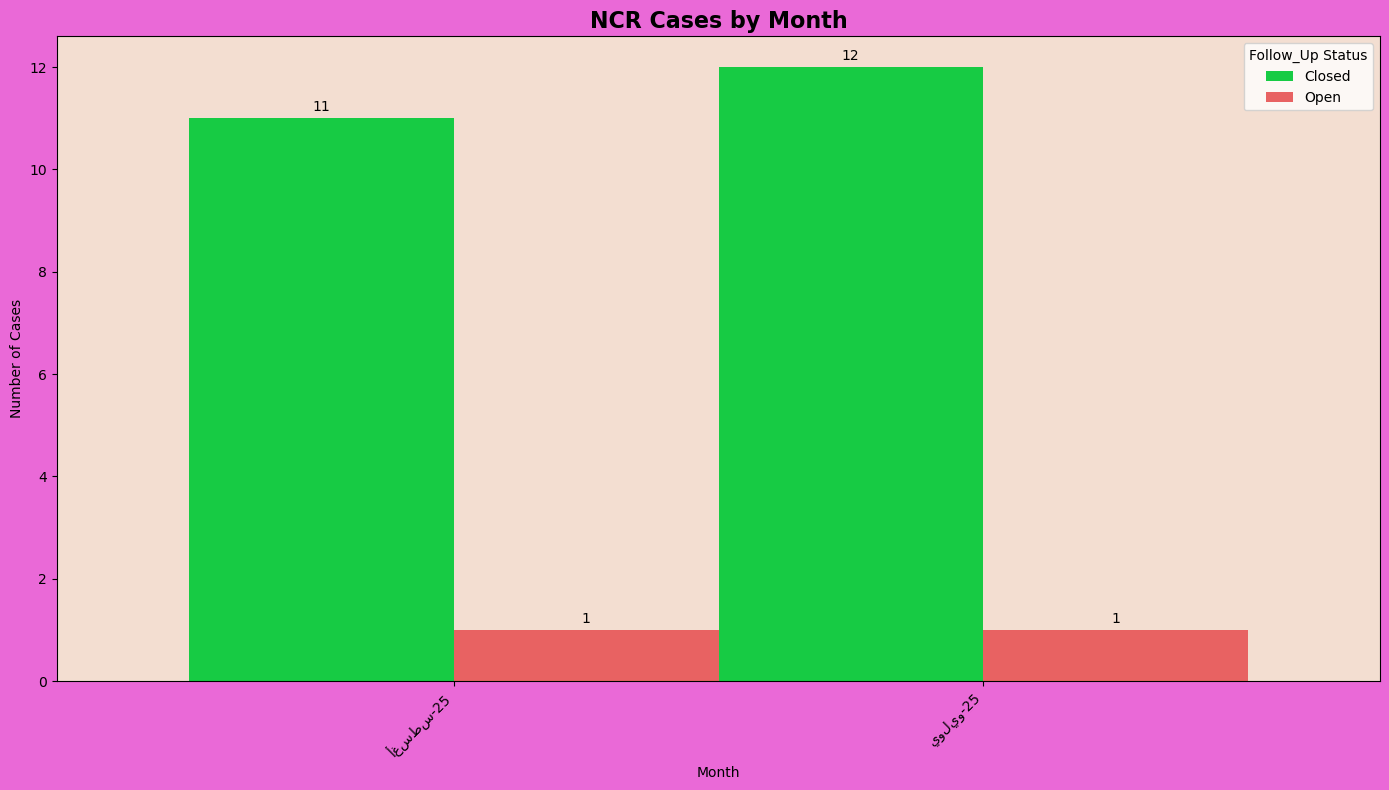

In [30]:
# إنشاء الرسومات البيانية
# 1. رسم بياني للحالات حسب الشهر
plt.figure(figsize=(14, 8))
ax1 = monthly_cases.plot(kind='bar', figsize=(14, 8), color=['#17CB44', '#E86262'], width=1.0)
plt.title('NCR Cases by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax1.set_facecolor("#f3ded1")  # لون خلفية الرسم البياني
plt.gcf().set_facecolor("#ea69d7")  # لون خلفية الشكل

# إضافة القيم على الأعمدة
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.savefig('/home/hesham/NMG/8-25/NCR Cases by Month.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())

plt.show()

<Figure size 1400x800 with 0 Axes>

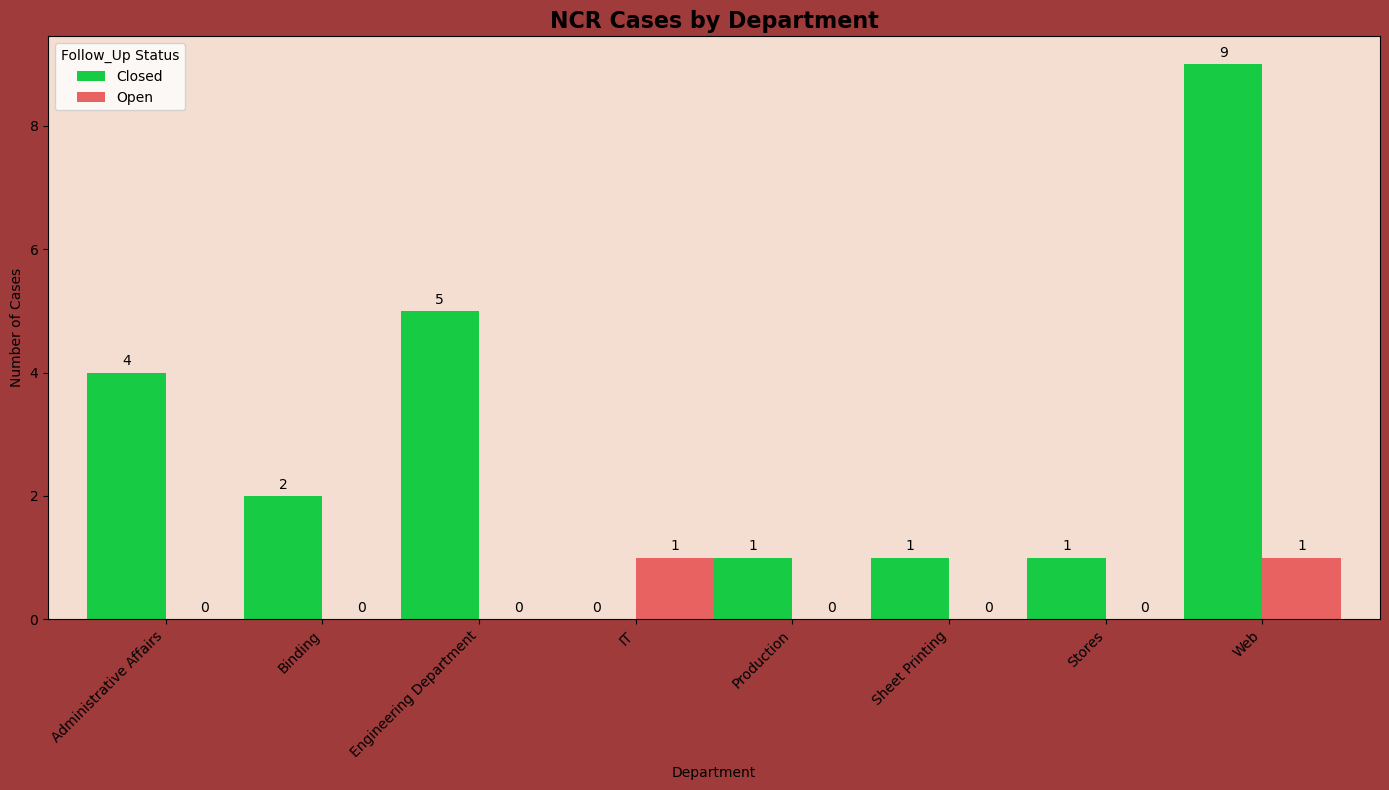

In [31]:
# 2. رسم بياني للحالات حسب القسم
plt.figure(figsize=(14, 8))
ax2 = dept_cases.plot(kind='bar', figsize=(14, 8), color=['#17CB44', '#E86262'], width=1.0)
plt.title('NCR Cases by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax2.set_facecolor("#f3ded1")  # لون خلفية الرسم البياني
plt.gcf().set_facecolor("#a03b3b")  # لون خلفية الشكل

# إضافة القيم على الأعمدة
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)
#لحفظ الرسم
plt.savefig('/home/hesham/NMG/8-25/NCR Cases by Department.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())
plt.show()

In [32]:
# 3. رسم بياني للحالات حسب المرسل (لأعلى 10 مرسلين)
top_reporters = reporter_cases.sum(axis=1).sort_values(ascending=False).head(10).index
top_reporter_cases = reporter_cases.loc[top_reporters]

plt.figure(figsize=(14, 8))
ax3 = top_reporter_cases.plot(kind='bar', figsize=(14, 8), color=['#17CB44', '#E86262'], width=1.0)
plt.title('Top 10 Reporters - NCR Cases', fontsize=16, fontweight='bold')
plt.xlabel('Reporter Name')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax3.set_facecolor("#f3ded1")  # لون خلفية الرسم البياني
plt.gcf().set_facecolor("#7992ed")  # لون خلفية الشكل

# إضافة القيم على الأعمدة
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.savefig('/home/hesham/NMG/8-25/Top 10 Reporters - NCR Cases.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())
plt.show()

TypeError: can only concatenate str (not "int") to str

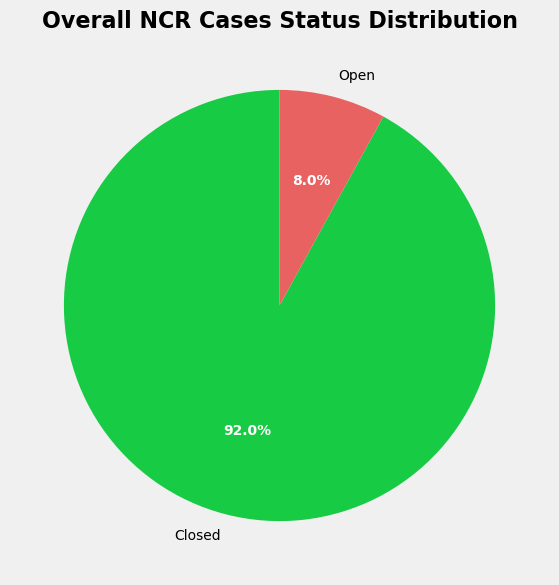

In [ ]:
# 4. رسم بياني للنسبة المئوية للحالات المغلقة مقابل المفتوحة
total_cases = cases['Follow_Up'].value_counts()
status_labels = ['Closed', 'Open']
status_counts = [total_cases.get('Closed', 0), total_cases.get('Opened', 0)]
colors = ['#17CB44', '#E86262']

plt.figure(figsize=(10, 7))
ax4 = plt.subplot(111)
wedges, texts, autotexts = ax4.pie(status_counts, labels=status_labels, autopct='%1.1f%%', 
                                  colors=colors, startangle=90)
plt.title('Overall NCR Cases Status Distribution', fontsize=16, fontweight='bold')

# تنسيق الخلفية
plt.gcf().set_facecolor("#f0f0f0")  # لون خلفية الشكل

# جعل النسب المئوية أكثر وضوحاً
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.savefig('/home/hesham/NMG/8-25/Overall NCR Cases Status Distribution.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())
plt.show()